In [1]:
%matplotlib inline

In [2]:
from maelzel.core import *
from maelzel.core import plotting

In [3]:
s = Score([
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5
      4D-:1:gliss
      6Gb-!,4A:ff
      0A:1
    ''')
])

setScoreStruct(r'''
4/4
3/4
''')

/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


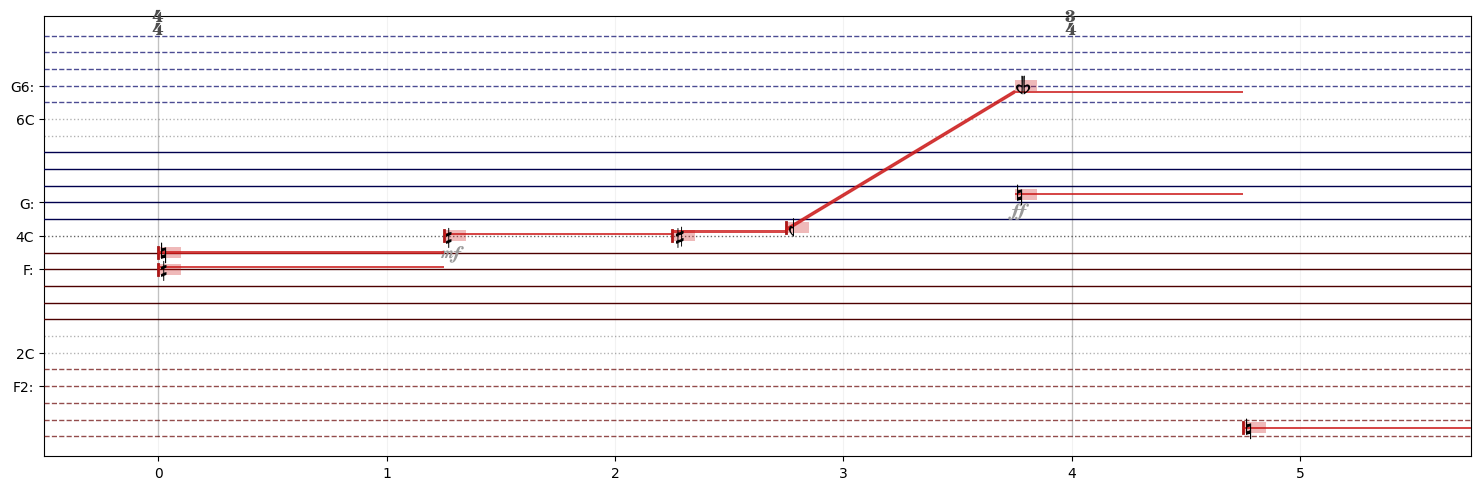

In [4]:
s.plot()

/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


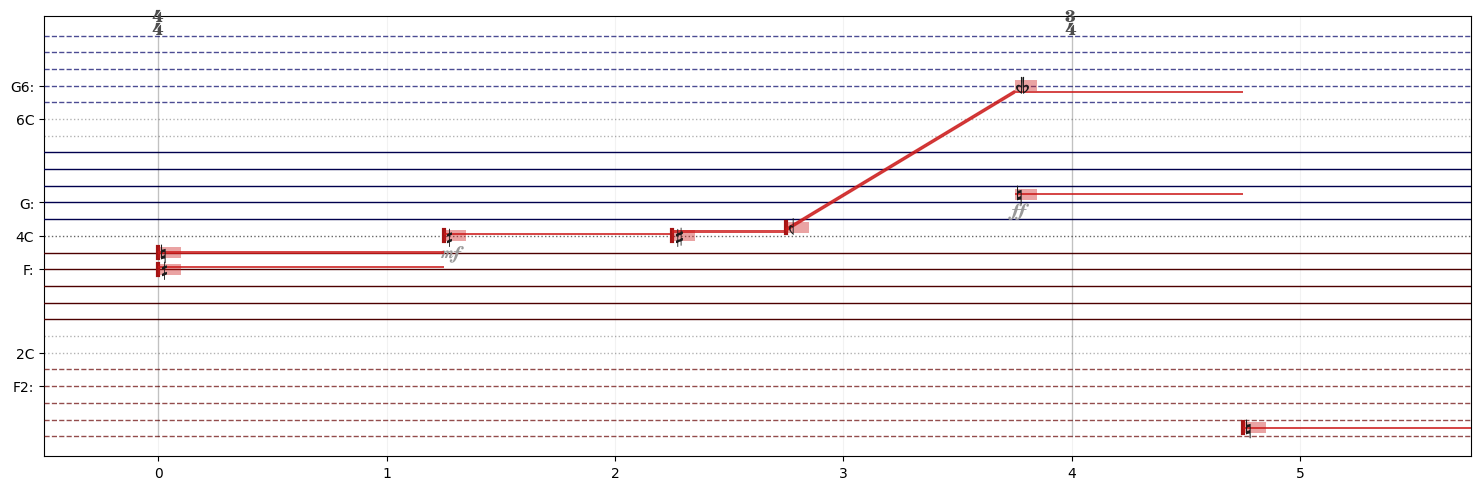

In [16]:
_plot.plotVoices(s.voices, accidentalColor=(0.1, 0.1, 0.1, 1), accidentalSize=20, eventStartLineWidth=3, chordLink=False, 
                 eventHeight=1.3, eventHeadAlpha=0.4, accidentalFixedScale=True, figsize=(15, 5))

In [10]:
s = Score([
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5
      4D-:1:gliss
      6Gb-!,4A:ff
      1C:1
    '''),
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5
      4D-:1:gliss
      6Gb-!,4A:ff
      1C:1
    ''').timeShift(0.5).transpose(-5)
])

setScoreStruct(r'''
5/8
7/8
''')

/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/em/.virtualenvs/maelzel/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


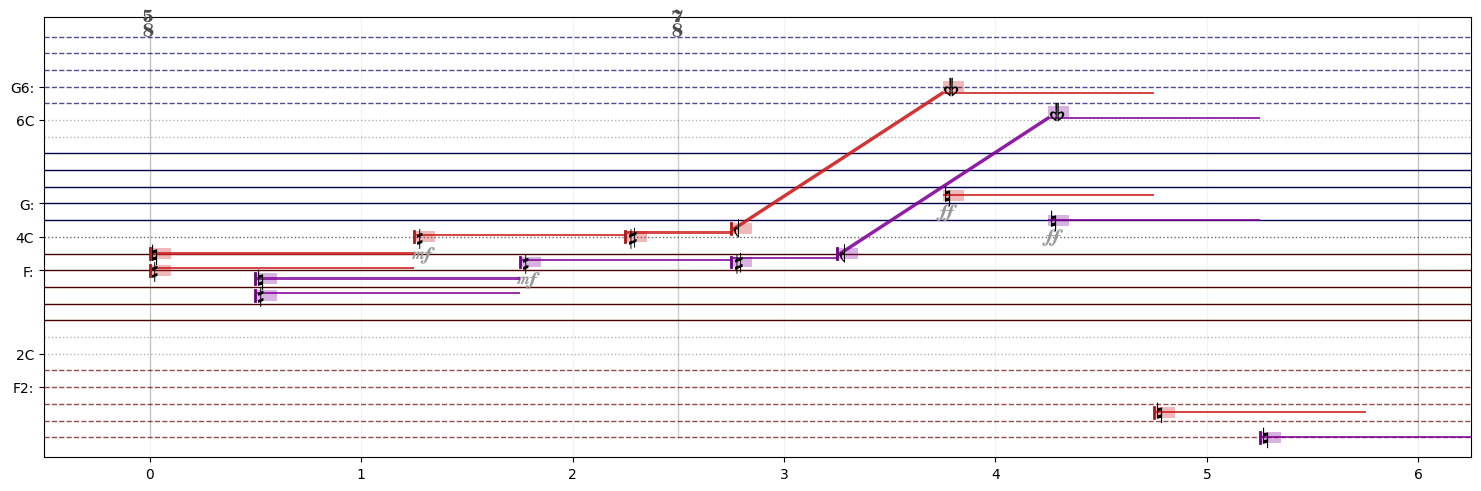

In [11]:
_plot.plotVoices(s.voices)

## Test clips

In [20]:
cl = Clip("../snd/piano-pitchtest-Cmaj.flac", pitch=60, speed=1)
samp = cl.asSample()
onsets = samp.onsets()
struct = getScoreStruct()
onsetbeats = [struct.timeToBeat(onset) for onset in onsets]

from emlib.iterlib import pairwise
durs = [o2 - o1 for o1, o2 in pairwise(onsetbeats)]
print(durs)

[Fraction(179029625023757095, 144115188075855872), Fraction(2614334477566547, 2251799813685248), Fraction(3124129700692023, 1125899906842624), Fraction(321889932550381, 140737488355328), Fraction(901945394760459, 1125899906842624), Fraction(124180887684411, 281474976710656), Fraction(169931741041825, 562949953421312), Fraction(88233788617871, 281474976710656), Fraction(34313140018061, 140737488355328), Fraction(37581058115019, 140737488355328)]


mnOut size: 899
m_pitchTrack size: 899


Voice([5C+11:1.242♩:offset=0.035, 5E+10:1.161♩:offset=1.277, 3C+16:2.775♩:offset=2.438, 3C+12:2.287♩:offset=5.213, 6C+23:0.302♩:offset=8.742, 5B+14:0.313♩:offset=9.044, 5A+03:0.244♩:offset=9.358])
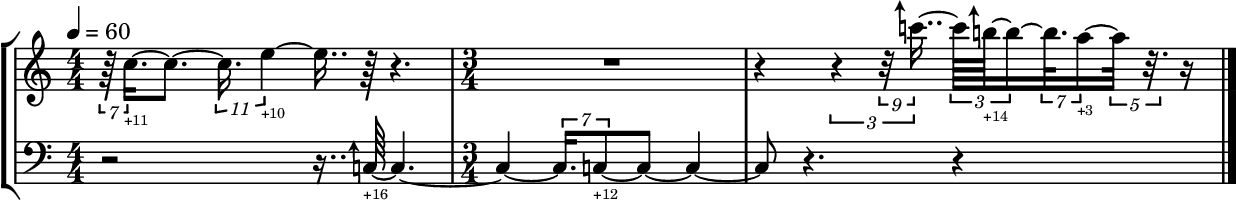

In [21]:
import pitchtools as pt
f0 = samp.fundamentalBpf()
freqs = f0.map(onsets)
transcr = Voice([Note(pt.f2m(freq), dur=dur, offset=beat) for beat, dur, freq in zip(onsetbeats, durs, freqs) if freq > 50])
transcr

In [22]:
transcr.play(instr='.piano')

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=7)
    Synth(𝍪 preset:.piano=502.0009 start=38.986 dur=1.242 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=0 p17=72.1116 p18=0.515178 p19=1.24227 …)
    Synth(𝍪 preset:.piano=502.001 start=40.228 dur=1.161 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=0 p17=76.1049 p18=0.515178 p19=1.161 …)
    Synth(𝍪 preset:.piano=502.0011 start=41.389 dur=2.775 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=0 p17=48.1647 p18=0.515178 p19=2.77478 …)
    Synth(𝍪 preset:.piano=502.0012 start=44.164 dur=2.287 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=0 p17=48.1221 p18=0.515178 p19=2.28717 …)
    Synth(𝍪 preset:.piano=502.0013 start=47.693 dur=0.302 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=0 p17=84.2268 p18=0.515178 p19=0.301859 …)
    Synth(𝍪 preset:.piano=502.0014 start=47.995 dur=0.313 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=0 p17=83.138 p18=0.515178 p19=0.313469 …)
    Synth(𝍪 preset:.piano=502.0015 start=48.308 dur=0.244 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=0 p17=81.0325 p18=0.515178 p19=0.24381 …)